# Clustering K-means

## Clustering sur les joueurs de NBA

In [63]:
import pandas as pd

nba = pd.read_csv('nba_2013.csv')
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


# Meneurs de jeu

In [64]:
point_guards = nba[nba['pos'] == 'PG']

In [65]:
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,115,130,313,53,3,125,147,930,2013-2014,2013
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,32,37,32,7,4,19,30,150,2013-2014,2013
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,138,154,303,26,0,125,129,660,2013-2014,2013
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,123,145,194,60,9,82,161,666,2013-2014,2013
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,146,159,307,54,8,102,85,378,2013-2014,2013
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,175,202,235,69,14,143,99,763,2013-2014,2013
60,Avery Bradley,PG,23,BOS,60,58,1855,361,825,0.438,...,178,226,85,63,11,96,145,891,2013-2014,2013
64,Aaron Brooks,PG,29,TOT,72,12,1557,233,581,0.401,...,97,140,233,52,13,117,146,645,2013-2014,2013
71,Trey Burke,PG,21,UTA,70,68,2262,341,897,0.380,...,171,208,396,42,6,131,145,895,2013-2014,2013
76,Dwight Buycks,PG,24,TOR,14,0,146,15,48,0.313,...,19,23,10,8,0,10,11,43,2013-2014,2013


# Points par match

In [66]:
pd.options.mode.chained_assignment = None

In [67]:
point_guards['ppg'] = point_guards['pts']/point_guards['g']

# Ratio passe décisive - perte de balle

In [68]:
import numpy as np

point_guards = point_guards[point_guards['tov'] != 0]

In [69]:
point_guards['atr'] = point_guards['ast']/point_guards['tov'] 

# Visualiser graphiquement ces meneurs de jeu

Text(0, 0.5, 'Ratio passes décisives turnover')

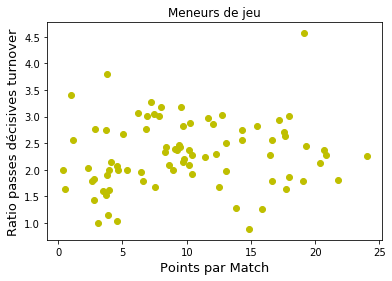

In [70]:
import matplotlib.pyplot as plt

plt.scatter(point_guards['ppg'], point_guards['atr'], c='y')
plt.title("Meneurs de jeu")
plt.xlabel('Points par Match', fontsize=13)
plt.ylabel('Ratio passes décisives turnover', fontsize=13)

In [71]:
#Joueur avec le meilleur ratio assist-turnover
point_guards['atr'].idxmax()

347

In [72]:
#Les joueurs ayant plus de 20 pts par matchs et un ratio supérieur
#à 2 pour assist-turnover

point_guards[(point_guards['ppg'] >= 20) & (point_guards['atr'] >= 2)]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
110,Stephen Curry,PG,25,GSW,78,78,2846,652,1383,0.471,...,666,128,14,294,194,1873,2013-2014,2013,24.012821,2.265306
218,Kyrie Irving,PG,21,CLE,71,71,2496,532,1237,0.430,...,433,108,23,190,163,1478,2013-2014,2013,20.816901,2.278947
272,Damian Lillard,PG,23,POR,82,82,2937,553,1304,0.424,...,457,64,22,193,197,1695,2013-2014,2013,20.670732,2.367876
423,Isaiah Thomas,PG,24,SAC,72,54,2497,496,1096,0.453,...,454,93,8,213,185,1465,2013-2014,2013,20.347222,2.131455


# L'algorithme Setup K-Means

In [73]:
import numpy as np
num_clusters = 5

# Utiliser la fonction random de Numpy pour générer une liste d'indices,
#taille: num_clusters

random_initial_points = np.random.choice(point_guards.index, size=num_clusters)

# Utiliser les indices aléatoires pour créer les centroïdes
centroids = point_guards.loc[random_initial_points]

In [74]:
centroids

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,ast,stl,blk,tov,pf,pts,season,season_end,ppg,atr
204,George Hill,PG,27,IND,76,76,2434,272,616,0.442,...,265,75,23,92,158,781,2013-2014,2013,10.276316,2.880435
207,Kirk Hinrich,PG,33,CHI,73,61,2116,243,619,0.393,...,286,80,26,120,203,666,2013-2014,2013,9.123288,2.383333
126,Toney Douglas,PG,27,TOT,51,17,675,73,190,0.384,...,68,19,5,34,81,202,2013-2014,2013,3.960784,2.000000
377,Ricky Rubio,PG,23,MIN,82,82,2638,255,670,0.381,...,704,191,11,221,218,781,2013-2014,2013,9.524390,3.185520
221,Reggie Jackson,PG,23,OKC,80,36,2277,403,916,0.440,...,331,85,9,168,142,1047,2013-2014,2013,13.087500,1.970238


# Visualiser les centroïdes

Text(0, 0.5, 'Ratio Assists Turnover')

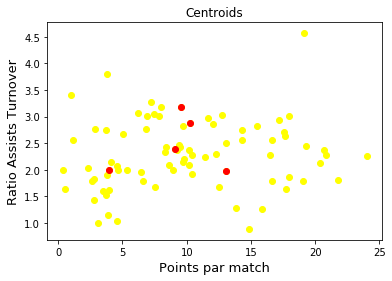

In [75]:
plt.scatter(point_guards['ppg'], point_guards['atr'], c='yellow')
plt.scatter(centroids['ppg'], centroids['atr'], c='red')
plt.title("Centroids")
plt.xlabel('Points par match', fontsize=13)
plt.ylabel('Ratio Assists Turnover', fontsize=13)

# Algorithme Setup K-Means (la suite)

In [76]:
def centroids_to_dict(centroids):
    dictionary = dict()
    
    # compteur itératif utilisé pour générer un cluster_id
    counter = 0
    
    # Itérer le dataframe en utilisant .iterrows() ligne par ligne
    for index, row in centroids.iterrows():
        coordinates = [row['ppg'], row['atr']]
        dictionary[counter] = coordinates
        counter += 1
        print(row)
    
    return dictionary

centroids_dict = centroids_to_dict(centroids)
centroids_dict

player          George Hill
pos                      PG
age                      27
bref_team_id            IND
g                        76
gs                       76
mp                     2434
fg                      272
fga                     616
fg.                   0.442
x3p                      95
x3pa                    260
x3p.               0.365385
x2p                     177
x2pa                    356
x2p.               0.497191
efg.                  0.519
ft                      142
fta                     176
ft.                   0.807
orb                      53
drb                     230
trb                     283
ast                     265
stl                      75
blk                      23
tov                      92
pf                      158
pts                     781
season            2013-2014
season_end             2013
ppg                 10.2763
atr                 2.88043
Name: 204, dtype: object
player          Kirk Hinrich
pos                   

{0: [10.276315789473685, 2.880434782608696],
 1: [9.123287671232877, 2.3833333333333333],
 2: [3.9607843137254903, 2.0],
 3: [9.524390243902438, 3.18552036199095],
 4: [13.0875, 1.9702380952380953]}

# Etape 1 (Distance Euclidienne)

In [77]:
import math

def calculate_distance(centroid, player_values):
    root_distance = 0
    
    for x in range(0, len(centroid)):
        difference = centroid[x] - player_values[x]
        squared_difference = difference ** 2
        root_distance += squared_difference
        
    euclid_distance = math.sqrt(root_distance)
    return euclid_distance

# test pour q et p
q = [5, 2]
p = [3, 1]

# sqrt(5) = 2.24
print(calculate_distance(q,p))

2.23606797749979


# Etape 1 (la suite)

In [78]:
def assign_to_cluster(row):
    dist_values=[]
    for key,dict_value in centroids_dict.items():
        dist = calculate_distance(dict_value,row[['ppg','atr']])
        dist_values.append(dist)
        lowest_distance = min(dist_values)
        if (dist == lowest_distance):
            cluster_id = key
    return cluster_id

In [79]:
#Fonction du prof


def assign_to_cluster(row):
    lowest_distance = -1
    closest_cluster = -1
    
    for cluster_id, centroid in centroids_dict.items():
        df_row = [row['ppg'], row ['atr']]
        euclidean_distance = calculate_distance(centroid, df_row)
        
        if lowest_distance == -1:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
        elif euclidean_distance < lowest_distance:
            lowest_distance = euclidean_distance
            closest_cluster = cluster_id
    return closest_cluster

In [80]:
point_guards['cluster']=point_guards.apply(lambda row: assign_to_cluster(row), axis=1)

In [81]:
assign_to_cluster

<function __main__.assign_to_cluster(row)>

In [82]:
point_guards

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,stl,blk,tov,pf,pts,season,season_end,ppg,atr,cluster
24,D.J. Augustin,PG,26,TOT,71,9,1939,298,718,0.415,...,53,3,125,147,930,2013-2014,2013,13.098592,2.504000,4
29,Leandro Barbosa,PG,31,PHO,20,0,368,56,131,0.427,...,7,4,19,30,150,2013-2014,2013,7.500000,1.684211,1
30,Jose Barea,PG,29,MIN,79,1,1471,254,656,0.387,...,26,0,125,129,660,2013-2014,2013,8.354430,2.424000,1
38,Jerryd Bayless,PG,25,TOT,72,19,1686,248,617,0.402,...,60,9,82,161,666,2013-2014,2013,9.250000,2.365854,1
50,Steve Blake,PG,33,TOT,55,28,1498,133,353,0.377,...,54,8,102,85,378,2013-2014,2013,6.872727,3.009804,1
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,69,14,143,99,763,2013-2014,2013,17.744186,1.643357,4
60,Avery Bradley,PG,23,BOS,60,58,1855,361,825,0.438,...,63,11,96,145,891,2013-2014,2013,14.850000,0.885417,4
64,Aaron Brooks,PG,29,TOT,72,12,1557,233,581,0.401,...,52,13,117,146,645,2013-2014,2013,8.958333,1.991453,1
71,Trey Burke,PG,21,UTA,70,68,2262,341,897,0.380,...,42,6,131,145,895,2013-2014,2013,12.785714,3.022901,4
76,Dwight Buycks,PG,24,TOR,14,0,146,15,48,0.313,...,8,0,10,11,43,2013-2014,2013,3.071429,1.000000,2


# Visualiser les Clusters

In [83]:
def visualize_clusters(df, num_clusters):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for n in range(num_clusters):
        clustered_df = df[df['cluster'] == n]
        plt.scatter(clustered_df['ppg'], clustered_df['atr'], c=colors[n-1])
    plt.xlabel('Points par Match', fontsize=13)
    plt.ylabel('Ratio assist turnover', fontsize=13)
    
    

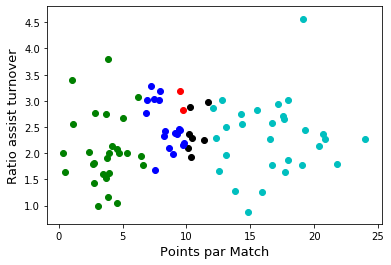

In [84]:
visualize_clusters(point_guards, 5)

# Etape 2

In [85]:


def recalculate_centroids(df):
    new_centroids_dict = dict()
    num_clusters = len(df['cluster'].unique())
    
    for cluster_id in range(0, num_clusters):
        avg_ppg = (df['ppg'][df['cluster']==cluster_id]).mean()
        avg_atr = (df['atr'][df['cluster']==cluster_id]).mean()
        coordinates = [avg_ppg, avg_atr]
        new_centroids_dict[cluster_id] = coordinates
        
    return(new_centroids_dict)
    
    

In [86]:
# fonction prof

def recalculate_centroids(df):
    new_centroids_dict = dict()
    
    for cluster_id in range(0, num_clusters):
        values_in_cluster = df[df['cluster'] == cluster_id]
        new_centroid = [np.average(values_in_cluster['ppg']),
                        np.average(values_in_cluster['atr'])]
        
        new_centroids_dict[cluster_id] = new_centroid
    return new_centroids_dict
        


In [87]:
centroids_dict = recalculate_centroids(point_guards)

In [88]:
centroids_dict

{0: [10.639626440968977, 2.396227305414441],
 1: [8.395865991836988, 2.520186921107849],
 2: [3.601676043406218, 2.058609501910136],
 3: [9.608348968105066, 3.0074888631660177],
 4: [16.7433359835985, 2.3103293541476737]}

# Répéter l'étape 1

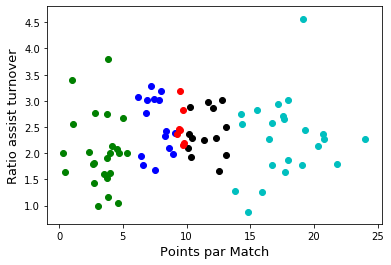

In [89]:
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row), axis=1)
visualize_clusters(point_guards, num_clusters)

# Répéter les étapes 1 et 2

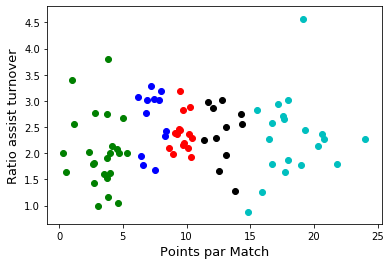

In [90]:
centroids_dict = recalculate_centroids(point_guards)
point_guards['cluster'] = point_guards.apply(lambda row: assign_to_cluster(row),axis=1)
visualize_clusters(point_guards, num_clusters)

In [93]:
point_guards[point_guards['cluster']==4]

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,stl,blk,tov,pf,pts,season,season_end,ppg,atr,cluster
52,Eric Bledsoe,PG,24,PHO,43,40,1416,265,556,0.477,...,69,14,143,99,763,2013-2014,2013,17.744186,1.643357,4
60,Avery Bradley,PG,23,BOS,60,58,1855,361,825,0.438,...,63,11,96,145,891,2013-2014,2013,14.850000,0.885417,4
85,Michael Carter-Williams,PG,22,PHI,70,70,2414,427,1054,0.405,...,130,43,247,213,1167,2013-2014,2013,16.671429,1.785425,4
99,Mike Conley,PG,26,MEM,73,73,2446,463,1030,0.450,...,110,13,150,141,1256,2013-2014,2013,17.205479,2.940000,4
110,Stephen Curry,PG,25,GSW,78,78,2846,652,1383,0.471,...,128,14,294,194,1873,2013-2014,2013,24.012821,2.265306,4
136,Monta Ellis,PG,28,DAL,82,82,3023,576,1278,0.451,...,141,23,264,197,1560,2013-2014,2013,19.024390,1.784091,4
218,Kyrie Irving,PG,21,CLE,71,71,2496,532,1237,0.430,...,108,23,190,163,1478,2013-2014,2013,20.816901,2.278947,4
232,Brandon Jennings,PG,24,DET,80,79,2728,423,1135,0.373,...,101,8,215,157,1241,2013-2014,2013,15.512500,2.832558,4
253,Brandon Knight,PG,22,MIL,72,69,2400,461,1092,0.422,...,69,17,188,146,1291,2013-2014,2013,17.930556,1.872340,4
262,Ty Lawson,PG,26,DEN,62,61,2222,347,806,0.431,...,100,10,200,113,1090,2013-2014,2013,17.580645,2.715000,4


# Utilisation de classe K-Means

In [62]:
nba = pd.read_csv('nba_2013.csv')
point_guards = nba[nba['pos']=='PG']
point_guards['ppg'] = point_guards['pts']/point_guards['g']
point_guards = point_guards[point_guards['tov'] != 0]
point_guards['atr'] = point_guards['ast']/point_guards['tov']

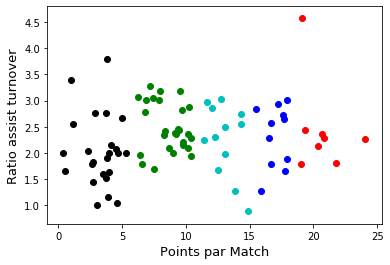

In [94]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(point_guards[['ppg','atr']])
point_guards['cluster'] = kmeans.labels_

visualize_clusters(point_guards, num_clusters)